# Capstone Project: Exploratory Data Analysis for Consumer Price per Index in Malaysia

## 📊 Project Title and Introduction:
**Title:** Cost of Living Pressures for Low-Income Households

**Introduction:**
----
The rising cost of living is a pressing issue, especially for low-income households earning less than RM3000 per month. Understanding how macroeconomic factors such as inflation, consumer prices, and population demographics intersect can help policymakers and businesses create strategies that improve affordability and economic resilience. This analysis integrates multiple datasets covering household CPI, state-level inflation, population demographics, and expenditure classification—to uncover meaningful insights into cost of living pressures in Malaysia.


## 📊 Scoping Data Analysis Project:

🔍 **Big Questions:**
- **Measure cost of living pressures on low-income households** by comparing national CPI indices with state-level inflation rates.
- **Identify categories of goods and services driving inflation** using the MCOICOP classification.
- **Examine demographic vulnerability** by linking population distributions (state, DUN, ethnicity, sex) with inflation categories.
- **Uncover patterns and relationships** such as whether states with higher non-citizen populations or different demographic balances experience different inflation impacts.


📑**Capstone Datasets:**
- The datasets were chosen from the https://data.gov.my, which includes five datasets.

| Dataset           | Key Columns                                                 |
|-------------------|-------------------------------------------------------------|
| Low-Income CPI    | date, division, index                                       |
| State Level CPI   | date, division, index                                       |
| Inflation CPI     | state, date, division, inflation_yoy, inflation_mom         |
| Population by DUN | date, state, parlimen, dun, sex, age, ethnicity, population |
| MCOICOP Lookup    | digits, division, group, class, subclass, desc_en, desc_bm  |



🔗**Relationships between the Datasets:**
- Low-Income CPI / State Level CPI / Inflation CPI describe cost-of-living trends by date, state, and division.
- Population by DUN links demographic context (state, date) to CPI trends, showing which groups are affected.
- MCOICOP Lookup maps CPI divisions/codes to detailed expenditure categories for interpretation.

## 📊 Data Preparing:

- load all datasets

In [3]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

# load datasets
lowincome_cpi = pd.read_csv("data/raw_cleaned/cpi_2d_lowincome.csv")
inflation_cpi = pd.read_csv("data/raw/cpi_2d_state_inflation.csv")
national_cpi = pd.read_csv("data/raw/cpi_2d.csv")
population = pd.read_csv("data/raw/population_dun.csv")
MCOICOP = pd.read_csv("data/raw/mcoicop.csv")

# quick inspection function
def inspect_dataset(name, df):
    print(f"\n===== {name} =====")
    print("\nInfo:")
    df.info()
    print("="*50)

# inspect all datasets
inspect_dataset("Low-Income CPI", lowincome_cpi)
inspect_dataset("Inflation", inflation_cpi)
inspect_dataset("Narional CPI", national_cpi)
inspect_dataset("Population by DUN", population)
inspect_dataset("MCOICOP", MCOICOP)




===== Low-Income CPI =====

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2632 non-null   object 
 1   division  2632 non-null   object 
 2   index     2519 non-null   float64
dtypes: float64(1), object(2)
memory usage: 61.8+ KB

===== Inflation =====

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41888 entries, 0 to 41887
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          41888 non-null  object 
 1   date           41888 non-null  object 
 2   division       41888 non-null  object 
 3   inflation_yoy  39424 non-null  float64
 4   inflation_mom  40078 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.6+ MB

===== Narional CPI =====

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data c

**1️⃣ Performing Data Cleaning:**
- Identify missing data values and resolve it if there's any
- Identify and remove duplicates

In [4]:
# Function for check for duplicates row
def identify_duplicates(df):
    duplicates = df.duplicated().sum()
    print("\nDuplicates:", duplicates)

    if duplicates > 0:
         print("Duplicate rows found:")
         display(df[df.duplicated(keep=False)])
         # remove duplicates row
         remove_duplicates(df)

# Function for remove duplicates row
def remove_duplicates(df):
     df.drop_duplicates()

     # verify
     print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


# check for skewed -0.5 and 0.5 → approximately normal, use mean else median
def check_skewness(col):
    col = pd.to_numeric(col, errors="coerce").dropna()   # drop missing values
    n = len(col)
    if n < 3:  # too few data
        return None

    mean = col.mean()
    std = col.std()
    n = len(col)

    skewness = ((col - mean)**3).sum() / n / (std**3)
    return skewness

# fill the missing data
def impute_data(col,method='mean'):
    if method == 'mean':
        return col.fillna(col.mean())
    elif method == 'median':
        return col.fillna(col.median())

#### low income dataset
# 1. copy
lowincome_cpi_cleaned = lowincome_cpi.copy()
national_cpi_cleaned = national_cpi.copy()
inflation_cpi_cleaned = inflation_cpi.copy()
population_cleaned = population.copy()
MCOICOP_cleaned = MCOICOP.copy()

# 1. check for duplicates
identify_duplicates(lowincome_cpi)
# 2. check missing values
print("Missing Values Count:\n", lowincome_cpi.isnull().sum())
# 3. check skeweness
print("Skewness (index):", check_skewness(lowincome_cpi['index']))
# 4. fill
lowincome_cpi_cleaned['index'] = impute_data(lowincome_cpi['index'], method='median')
# 5. verify
print("Missing values after cleaning:\n", lowincome_cpi_cleaned.isnull().sum())



Duplicates: 0
Missing Values Count:
 date          0
division      0
index       113
dtype: int64
Skewness (index): 1.6944989496677305
Missing values after cleaning:
 date        0
division    0
index       0
dtype: int64


In [5]:
#### national_cpi dataset
# 1. check for duplicates
identify_duplicates(national_cpi)

# 2. remove_duplicates(df)
print("Missing Values Count:\n", national_cpi.isnull().sum())

# 3. check skew
print("Skewness (index):", check_skewness(national_cpi['index']))

# 4. fill missing data
national_cpi_cleaned['index'] = impute_data(national_cpi['index'], method='mean')

# 5. verify
print("Missing values after cleaning:\n", national_cpi_cleaned.isnull().sum())


Duplicates: 0
Missing Values Count:
 date          0
division      0
index       457
dtype: int64
Skewness (index): 0.88202646150267
Missing values after cleaning:
 date        0
division    0
index       0
dtype: int64


In [6]:
#### inflation_cpi dataset
# 1. check for duplicates
identify_duplicates(inflation_cpi)

# 2. remove_duplicates(df)
print("Missing Values Count:\n", inflation_cpi.isnull().sum())

# 3. check skew
print("Skewness (inflation_yoy):", check_skewness(inflation_cpi['inflation_yoy']))
print("Skewness (inflation_mom):", check_skewness(inflation_cpi['inflation_mom']))

# 4. fill missing data
inflation_cpi_cleaned['inflation_yoy'] = impute_data(inflation_cpi['inflation_yoy'], method='median')
inflation_cpi_cleaned['inflation_mom'] = impute_data(inflation_cpi['inflation_mom'], method='median')

# 5. verify
print("Missing values after cleaning:\n", inflation_cpi_cleaned.isnull().sum())


Duplicates: 0
Missing Values Count:
 state               0
date                0
division            0
inflation_yoy    2464
inflation_mom    1810
dtype: int64
Skewness (inflation_yoy): 1.8073331594698339
Skewness (inflation_mom): 3.5597662693415035
Missing values after cleaning:
 state            0
date             0
division         0
inflation_yoy    0
inflation_mom    0
dtype: int64


In [7]:
# population dataset
# 1. check for duplicates
identify_duplicates(population)

# 2. remove_duplicates(df)
print("Missing Values Count:\n", population.isnull().sum())

# 3. check skew
print(population['age'].nunique)
print("Skewness (index):", check_skewness(population['population']))

# 4. fill missing data
population_cleaned['age'] = population['age'].fillna("overall")
population_cleaned['population'] = impute_data(population['population'], method='median')

# 5. verify
print("Missing values after cleaning:\n", population_cleaned.isnull().sum())


Duplicates: 0
Missing Values Count:
 date            0
state           0
parlimen        0
dun             0
sex             0
age           409
ethnicity       0
population    388
dtype: int64
<bound method IndexOpsMixin.nunique of 0       overall
1       overall
2       overall
3       overall
4       overall
         ...   
8995    overall
8996    overall
8997    overall
8998    overall
8999    overall
Name: age, Length: 9000, dtype: object>
Skewness (index): 3.209489941188062
Missing values after cleaning:
 date          0
state         0
parlimen      0
dun           0
sex           0
age           0
ethnicity     0
population    0
dtype: int64


In [8]:
# 1. check for duplicates
identify_duplicates(MCOICOP)

# 2. check missing data
print("Missing Values Count:\n", MCOICOP.isna().sum())
MCOICOP.head()

# No need to fill missing data
# Keep the NaN values because they just show empty levels in the hierarchy, not missing data.
#  just fill na so there is no missing vlaues
MCOICOP_cleaned = MCOICOP_cleaned.fillna('N/A')

# 3. verify
print("Missing values after cleaning:\n", MCOICOP_cleaned.isnull().sum())



Duplicates: 0
Missing Values Count:
 digits        0
division      0
group        14
class        61
subclass    162
desc_en       0
desc_bm       0
dtype: int64
Missing values after cleaning:
 digits      0
division    0
group       0
class       0
subclass    0
desc_en     0
desc_bm     0
dtype: int64


**2️⃣ Performing Data Manipulation and Transformation:**
- Standardized formatting for date-time fields and categorical variables.
- Ensured consistent data types across columns.
- Created customized calculated and general categorization columns suitable for analysis.
- Performed range checks to validate data accuracy

In [9]:
# copy
inflation_cpi_manipulated = inflation_cpi_cleaned.copy()
national_cpi_manipulated = national_cpi_cleaned.copy()
lowincome_cpi_manipulated = lowincome_cpi_cleaned.copy()
population_manipulated = population_cleaned.copy()
MCOICOP_manipulated = MCOICOP_cleaned.copy()

# 1. standardize formating
# a. Align Dates Across Datasets
for df in [inflation_cpi_manipulated, lowincome_cpi_manipulated, population_manipulated, national_cpi_manipulated]:
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Verify
print("Date range check:")
# this will check date from earliest date and the latest date
print("Inflation CPI -", inflation_cpi_manipulated["date"].min(), "to", inflation_cpi_manipulated["date"].max())
print("National CPI -", national_cpi_manipulated["date"].min(), "to", national_cpi_manipulated["date"].max())
print("Low income -", lowincome_cpi_manipulated["date"].min(), "to", lowincome_cpi_manipulated["date"].max())
print("Population -", population_manipulated["date"].min(), "to", population_manipulated["date"].max())

Date range check:
Inflation CPI - 2010-02-01 00:00:00 to 2025-08-01 00:00:00
National CPI - 2000-01-01 00:00:00 to 2025-08-01 00:00:00
Low income - 2010-01-01 00:00:00 to 2025-08-01 00:00:00
Population - 2020-01-01 00:00:00 to 2022-01-01 00:00:00


In [10]:
# ba. Ensure categorical types
inflation_cpi_manipulated["division"] = inflation_cpi_manipulated["division"].astype(str)
national_cpi_manipulated["division"] = national_cpi_manipulated["division"].astype(str)
MCOICOP_manipulated["division"] = MCOICOP_manipulated["division"].astype(str)

# Convert group, class, subclass to string (keep N/A if missing)
for col in ["group", "class", "subclass"]:
    MCOICOP_manipulated[col] = (
        MCOICOP_manipulated[col]
        .fillna("N/A")           # keep missing as "N/A"
        .astype(str)             # convert to string
        .str.replace(r"\.0$", "", regex=True)  # remove .0 from floats like 1.0 → 1
    )

# bb. Ensure numeric types
inflation_cpi_manipulated["inflation_yoy"] = pd.to_numeric(inflation_cpi_manipulated["inflation_yoy"], errors="coerce")
inflation_cpi_manipulated["inflation_mom"] = pd.to_numeric(inflation_cpi_manipulated["inflation_mom"], errors="coerce")
national_cpi_manipulated["index"] = pd.to_numeric(national_cpi_manipulated["index"], errors="coerce")
lowincome_cpi_manipulated["index"] = pd.to_numeric(lowincome_cpi_manipulated["index"], errors="coerce")
population_cleaned["population"] = pd.to_numeric(population_manipulated["population"], errors="coerce")

# Verify
print("Data types:")
print(inflation_cpi_manipulated.dtypes.head())
print(national_cpi_manipulated.dtypes.head())
print(lowincome_cpi_manipulated.dtypes.head())
print(MCOICOP_manipulated.head())

Data types:
state                    object
date             datetime64[ns]
division                 object
inflation_yoy           float64
inflation_mom           float64
dtype: object
date        datetime64[ns]
division            object
index              float64
dtype: object
date        datetime64[ns]
division            object
index              float64
dtype: object
   digits division group class subclass              desc_en  \
0       1  overall   N/A   N/A      N/A            All items   
1       2       01   N/A   N/A      N/A     Food & Beverages   
2       3       01     1   N/A      N/A  Food away from home   
3       4       01     1    11      N/A  Food away from home   
4       5       01     1    11      111  Food away from home   

                 desc_bm  
0             Semua item  
1      Makanan & Minuman  
2  Makanan di luar rumah  
3  Makanan di luar rumah  
4  Makanan di luar rumah  


In [11]:
# 2. Create calculated columns
# a. create column for population_ratio
population_manipulated["pop_ratio"] = population_manipulated["population"]
population_manipulated["pop_ratio"] = population_manipulated["population"] / population_manipulated["population"].sum()

# Verify
print("Calculated columns preview:")
print(population_manipulated.head())

Calculated columns preview:
        date   state            parlimen               dun     sex      age  \
0 2020-01-01  Perlis  P.001 Padang Besar  N.01 Titi Tinggi    both  overall   
1 2020-01-01  Perlis  P.001 Padang Besar  N.01 Titi Tinggi    both  overall   
2 2020-01-01  Perlis  P.001 Padang Besar  N.01 Titi Tinggi    both  overall   
3 2020-01-01  Perlis  P.001 Padang Besar  N.01 Titi Tinggi  female  overall   
4 2020-01-01  Perlis  P.001 Padang Besar  N.01 Titi Tinggi    male  overall   

    ethnicity  population  pop_ratio  
0     overall      18.696   0.000069  
1     citizen      18.193   0.000067  
2  noncitizen       0.503   0.000002  
3     overall       8.831   0.000033  
4     overall       9.865   0.000037  


In [12]:
# b. Create a mapping for division -> category
division_mapping = {
    "01": "Food & Beverages",
    "02": "Alcohol & Tobacco",
    "03": "Clothing & Footwear",
    "04": "Housing & Utilities",
    "05": "Furniture & Maintenance",
    "06": "Health",
    "07": "Transport",
    "08": "Communication",
    "09": "Recreation & Culture",
    "10": "Education",
    "11": "Restaurants & Hotels",
    "12": "Finance & Insurance",
    "13": "Personal Care & Misc."
}


# Make sure division column is string
MCOICOP_manipulated['division'] = MCOICOP_manipulated['division'].astype(str)

# Create category column
MCOICOP_manipulated['category'] = MCOICOP_manipulated['division'].map(division_mapping)
# For overall items (digits == 1), assign "Semua item"
MCOICOP_manipulated.loc[MCOICOP_manipulated['digits'] == 1, 'category'] = 'All Item'

# Check the result
print(MCOICOP_manipulated[['digits', 'division', 'category']].head(20))

# performed data quality checks

    digits division          category
0        1  overall          All Item
1        2       01  Food & Beverages
2        3       01  Food & Beverages
3        4       01  Food & Beverages
4        5       01  Food & Beverages
5        3       01  Food & Beverages
6        4       01  Food & Beverages
7        5       01  Food & Beverages
8        5       01  Food & Beverages
9        5       01  Food & Beverages
10       5       01  Food & Beverages
11       5       01  Food & Beverages
12       4       01  Food & Beverages
13       5       01  Food & Beverages
14       5       01  Food & Beverages
15       5       01  Food & Beverages
16       4       01  Food & Beverages
17       5       01  Food & Beverages
18       5       01  Food & Beverages
19       5       01  Food & Beverages


In [13]:
# 5. Range checks
inflation_cpi_manipulated = inflation_cpi_manipulated[inflation_cpi_manipulated["inflation_yoy"].between(-20, 20)]
lowincome_cpi_manipulated = lowincome_cpi_manipulated[lowincome_cpi_manipulated["index"].between(50, 200)]
national_cpi_manipulated = national_cpi_manipulated[national_cpi_manipulated["index"].between(50, 200)]

# Verify
print("Inflation:", inflation_cpi_manipulated["inflation_yoy"].min(), inflation_cpi_manipulated["inflation_yoy"].max())
print("National CPI:", national_cpi_manipulated["index"].min(), national_cpi_manipulated["index"].max())
print("Low-income CPI:", lowincome_cpi_manipulated["index"].min(), lowincome_cpi_manipulated["index"].max())

Inflation: -20.0 20.0
National CPI: 54.9 173.6
Low-income CPI: 85.3 176.9


**3️⃣ Performing Data Joining:**
- Merged datasets correctly using appropriate join types
- Managed missing values that appeared after merging.

In [14]:
# Join 1: Inflation CPI + Population
# merge
demo_merged = inflation_cpi_manipulated.merge(
    population_manipulated,
    on=["state", "date"],
    how="left"
)
demo_merged = demo_merged.dropna()

# Reset index after dropping
demo_merged.reset_index(drop=True, inplace=True)

# Verify
print("Merged Inflation CPI + Population:")
demo_merged.head()

Merged Inflation CPI + Population:


,state,date,division,inflation_yoy,inflation_mom,parlimen,dun,sex,age,ethnicity,population,pop_ratio
0,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,both,overall,overall,31.9560,0.000118
1,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,both,overall,citizen,20.6115,0.000076
2,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,both,overall,noncitizen,3.2210,0.000012
3,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,female,overall,overall,14.2120,0.000053
4,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,male,overall,overall,17.7440,0.000066


In [15]:
# Join 2: Low Income + National + MCOICOP
cpi_compare = lowincome_cpi_manipulated.merge(
    national_cpi_manipulated,
    on=['date', 'division'],
    how="inner",
    suffixes=('_lowincome','_national')
)

cpi_compare = cpi_compare.merge(
    MCOICOP_manipulated[['division', 'digits','desc_en', 'desc_bm', 'category']],
    on='division', how="left"
)

# Verify
print("Merged Low Income + National + MCOICOP:")
cpi_compare.head()

Merged Low Income + National + MCOICOP:


,date,division,index_lowincome,index_national,digits,desc_en,desc_bm,category
0,2010-01-01,overall,99.3,99.4,1,All items,Semua item,All Item
1,2010-02-01,overall,99.3,99.4,1,All items,Semua item,All Item
2,2010-03-01,overall,99.3,99.4,1,All items,Semua item,All Item
3,2010-04-01,overall,99.3,99.4,1,All items,Semua item,All Item
4,2010-05-01,overall,99.5,99.6,1,All items,Semua item,All Item


In [16]:
# Join 3: Low-Income CPI + MCOICOP
merged_lowincome = pd.merge(
    lowincome_cpi_manipulated,
    MCOICOP_manipulated[['division', 'digits','desc_en', 'desc_bm', 'category']],
    on="division", how="left"
)

# Verify
print("Merged Low Income CPI + MCOICOP:")
merged_lowincome.head()

Merged Low Income CPI + MCOICOP:


,date,division,index,digits,desc_en,desc_bm,category
0,2010-01-01,overall,99.3,1,All items,Semua item,All Item
1,2010-02-01,overall,99.3,1,All items,Semua item,All Item
2,2010-03-01,overall,99.3,1,All items,Semua item,All Item
3,2010-04-01,overall,99.3,1,All items,Semua item,All Item
4,2010-05-01,overall,99.5,1,All items,Semua item,All Item


In [17]:
# Join 4: National + MCOICOP
merged_national = pd.merge(
    inflation_cpi_manipulated,
    MCOICOP_manipulated[['division', 'digits','desc_en', 'desc_bm', 'category']],
    on='division', how="left"
)

# Verify
print("Merged National CPI + MCOICOP:")
merged_national.head()

Merged National CPI + MCOICOP:


,state,date,division,inflation_yoy,inflation_mom,digits,desc_en,desc_bm,category
0,Johor,2010-02-01,overall,1.2,0.0,1,All items,Semua item,All Item
1,Johor,2010-03-01,overall,1.2,0.0,1,All items,Semua item,All Item
2,Johor,2010-04-01,overall,1.2,0.0,1,All items,Semua item,All Item
3,Johor,2010-05-01,overall,1.2,0.2,1,All items,Semua item,All Item
4,Johor,2010-06-01,overall,1.2,0.2,1,All items,Semua item,All Item


## 4️⃣ Exploratory Data Analysis

1. Summarize datasets to understand overall structure and basic stats.
2. Focus only on low-income households and relevant periods.
3. Segment analysis



### Descriptive Analysis:

- Explore overall descriptive analysis.
- Filter subsets to answer big questions.

In [42]:
# 1.broad analyst
# a. summarize numerical variables
demo_merged_numerical = demo_merged.drop(columns=['division']).select_dtypes(include="number")
cpi_compare_numerical = (cpi_compare.drop(columns=['division'])
                         .select_dtypes(include="number"))
merged_lowincome_numerical = merged_lowincome.drop(columns=['division']).select_dtypes(include="number")
merged_national_numerical = merged_national.drop(columns=['division']).select_dtypes(include="number")

print("Descriptive statistics for merged dataset inflation and population\n", demo_merged_numerical.describe())
print("Descriptive statistics for merged dataset national cpi and low income and MCOICOP\n", cpi_compare_numerical.describe())
print("\nDescriptive statistics for merged dataset low income cpi and MCOICOP\n", merged_lowincome_numerical.describe())
print("\nDescriptive statistics for merged dataset national cpi and MCOICOP\n", merged_national_numerical.describe())


Descriptive statistics for merged dataset inflation and population
        inflation_yoy  inflation_mom     population      pop_ratio
count  126000.000000  126000.000000  126000.000000  126000.000000
mean        0.763484       0.335690      30.004749       0.000111
std         1.837446       0.864694      34.997076       0.000130
min        -7.800000      -1.100000       0.000000       0.000000
25%         0.000000       0.000000      10.435250       0.000039
50%         0.500000       0.100000      20.611500       0.000076
75%         1.600000       0.300000      36.800000       0.000136
max         8.500000       5.700000     310.900000       0.001151
Descriptive statistics for merged dataset national cpi and low income and MCOICOP
        index_lowincome  index_national        digits
count     64484.000000    64484.000000  64484.000000
mean        115.217173      115.517080      4.306122
std          15.397213       15.759496      0.865371
min          85.300000       88.400000     

In [43]:
# b. summarize categorial variables
population_cpi_categorial = demo_merged.select_dtypes(include="object")
CPI_categorial = cpi_compare.select_dtypes(include="object")
MCOICOP_lowincome_categorial = merged_lowincome.select_dtypes(include="object")
MCOICOP_cpi_categorial = merged_national.select_dtypes(include="object")

# List of merged datasets
merged_datasets = {
    "Population CPI": population_cpi_categorial,
    "Low-Income CPI": CPI_categorial,
    "CPI Comparison": MCOICOP_lowincome_categorial,
    "National CPI": MCOICOP_cpi_categorial
}

for name, df in merged_datasets.items():
    print(f"\nFrequency Distribution for Categorical Variables: {name}")

    # Select only categorical/object columns
    categorical_columns = df.select_dtypes(include="object").columns

    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())



Frequency Distribution for Categorical Variables: Population CPI

Column: state
state
Sarawak            17220
Sabah              15330
Perak              12390
Selangor           11760
Johor              11760
Kelantan            9450
Pahang              8820
Pulau Pinang        8400
Kedah               7560
Negeri Sembilan     7560
Terengganu          6720
Melaka              5880
Perlis              3150
Name: count, dtype: int64

Column: division
division
overall    9000
01         9000
02         9000
03         9000
04         9000
05         9000
06         9000
07         9000
08         9000
09         9000
10         9000
11         9000
12         9000
13         9000
Name: count, dtype: int64

Column: parlimen
parlimen
P.128 Seremban        1260
P.138 Kota Melaka     1050
P.134 Masjid Tanah    1050
P.139 Jasin           1050
P.135 Alor Gajah      1050
                      ... 
P.101 Hulu Langat      420
P.099 Ampang           420
P.092 Sabak Bernam     420
P.107 Sungai Bu

In [20]:
# 2. filter
# fix date for cpi comparison
cpi_compare_filtered = cpi_compare[(cpi_compare['date'] >= '2018-01-01') & (cpi_compare['date'] <= '2023-12-31')]
# Handling Missing Data
cpi_compare_filtered = cpi_compare_filtered.dropna(subset=['index_lowincome','index_national'])
cpi_compare_filtered.head()

,date,division,index_lowincome,index_national,digits,desc_en,desc_bm,category
96,2018-01-01,overall,122.2,121.3,1,All items,Semua item,All Item
97,2018-02-01,overall,122.2,121.3,1,All items,Semua item,All Item
98,2018-03-01,overall,121.8,120.9,1,All items,Semua item,All Item
99,2018-04-01,overall,121.6,120.9,1,All items,Semua item,All Item
100,2018-05-01,overall,121.8,121.1,1,All items,Semua item,All Item


In [21]:
low_cpi_filtered = merged_lowincome[
    (merged_lowincome['date'] >= '2018-01-01') &
    (merged_lowincome['date'] <= '2023-12-31')
]
low_cpi_filtered.head()

,date,division,index,digits,desc_en,desc_bm,category
96,2018-01-01,overall,122.2,1,All items,Semua item,All Item
97,2018-02-01,overall,122.2,1,All items,Semua item,All Item
98,2018-03-01,overall,121.8,1,All items,Semua item,All Item
99,2018-04-01,overall,121.6,1,All items,Semua item,All Item
100,2018-05-01,overall,121.8,1,All items,Semua item,All Item


In [22]:
demo_filtered =demo_merged[
    (demo_merged['date'] >= '2018-01-01') &
    (demo_merged['division'] == 'overall') &
    (demo_merged['ethnicity'].isin(['citizen','noncitizen']))
]
demo_filtered.head()

,state,date,division,inflation_yoy,inflation_mom,parlimen,dun,sex,age,ethnicity,population,pop_ratio
1,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,both,overall,citizen,20.6115,0.000076
2,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.01 Buloh Kasap,both,overall,noncitizen,3.2210,0.000012
6,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.02 Jementah,both,overall,citizen,42.4900,0.000157
7,Johor,2020-01-01,overall,1.8,0.2,P.140 Segamat,N.02 Jementah,both,overall,noncitizen,1.5650,0.000006
11,Johor,2020-01-01,overall,1.8,0.2,P.141 Sekijang,N.03 Pemanis,both,overall,citizen,30.9910,0.000115


In [23]:
nat_filtered = merged_national[
    (merged_national['date'] >= '2018-01-01') &
    (merged_national['date'] <= '2023-12-31')
]
nat_filtered.head()

,state,date,division,inflation_yoy,inflation_mom,digits,desc_en,desc_bm,category
95,Johor,2018-01-01,overall,2.9,0.3,1,All items,Semua item,All Item
96,Johor,2018-02-01,overall,1.5,0.1,1,All items,Semua item,All Item
97,Johor,2018-03-01,overall,1.1,-0.5,1,All items,Semua item,All Item
98,Johor,2018-04-01,overall,1.3,0.0,1,All items,Semua item,All Item
99,Johor,2018-05-01,overall,2.0,0.2,1,All items,Semua item,All Item


In [34]:
# aggregation
# Add year column
cpi_compare_filtered['year'] = cpi_compare_filtered['date'].dt.year

# Yearly average CPI per category
cpi_yearly = cpi_compare_filtered.groupby('year')[['index_lowincome','index_national']].mean().reset_index()

# Calculate gap
cpi_yearly['gap'] = cpi_yearly['index_lowincome'] - cpi_yearly['index_national']
cpi_yearly.head(100)

,year,index_lowincome,index_national,gap
0,2018,118.230224,117.584820,0.645403
1,2019,118.508139,118.878954,-0.370815
2,2020,117.497473,118.290477,-0.793004
3,2021,119.835617,120.298041,-0.462424
4,2022,122.741254,124.583919,-1.842665
5,2023,126.496113,126.873272,-0.377159


In [25]:
category_avg = low_cpi_filtered.groupby('category')['index'].mean().reset_index().sort_values(by='index', ascending=False)
category_avg.head()

,category,index
0,Alcohol & Tobacco,170.256944
12,Restaurants & Hotels,136.762500
6,Food & Beverages,136.204167
1,All Item,124.175000
8,Health,123.675000


In [26]:
# Weighted inflation by population ratio
demo_state_agg = demo_filtered.groupby(['state','ethnicity']).agg(
    weighted_inflation = pd.NamedAgg(
        column='inflation_yoy',
        aggfunc=lambda x: (x * demo_filtered.loc[x.index, 'pop_ratio']).sum() / demo_filtered.loc[x.index, 'pop_ratio'].sum()
    )
).reset_index()
demo_state_agg.head()


,state,ethnicity,weighted_inflation
0,Johor,citizen,1.065387
1,Johor,noncitizen,1.089043
2,Kedah,citizen,0.994340
3,Kedah,noncitizen,1.071661
4,Kelantan,citizen,1.212957


In [37]:

state_cat_avg = nat_filtered.groupby(['state','category'])['inflation_yoy'].mean().reset_index()
# state_cat_avg.head(10)
state = "Selangor"
subset = state_cat_avg[state_cat_avg["state"] == state]

print(subset)

        state                 category  inflation_yoy
154  Selangor        Alcohol & Tobacco       0.640278
155  Selangor                 All Item       1.898611
156  Selangor      Clothing & Footwear      -0.320833
157  Selangor            Communication      -0.752778
158  Selangor                Education       1.145833
159  Selangor      Finance & Insurance      -0.787500
160  Selangor         Food & Beverages       3.561111
161  Selangor  Furniture & Maintenance       2.130556
162  Selangor                   Health       1.202778
163  Selangor      Housing & Utilities       1.463889
164  Selangor    Personal Care & Misc.       1.395833
165  Selangor     Recreation & Culture       1.126389
166  Selangor     Restaurants & Hotels       2.590278
167  Selangor                Transport       0.964286


### Data Visualisation:
- Visualise data in graphs to better understand the data.

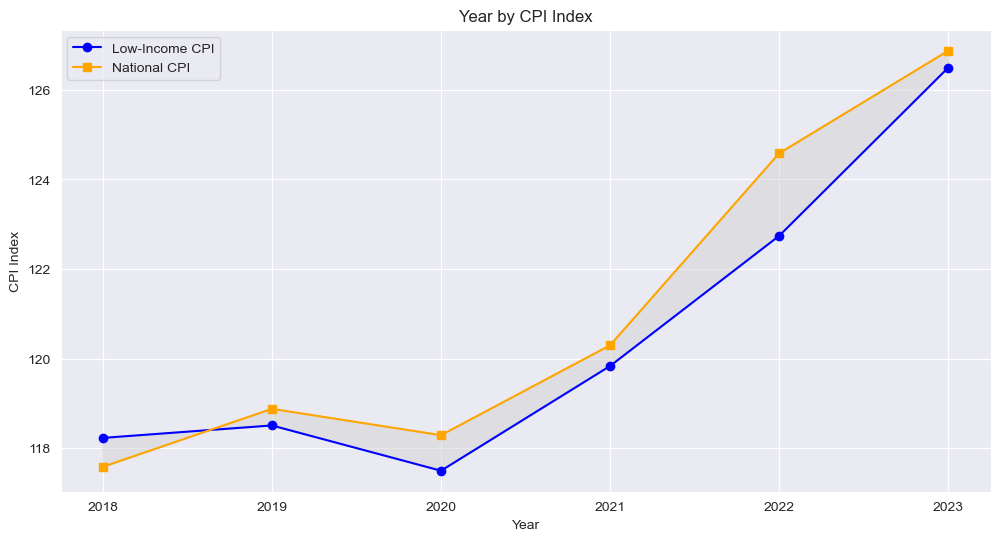

In [28]:
# obj1: Compare Low-Income CPI vs National CPI

plt.figure(figsize=(12,6))
plt.fill_between(cpi_yearly['year'], cpi_yearly['index_lowincome'], cpi_yearly['index_national'], color='lightgray', alpha=0.5)

plt.plot(cpi_yearly['year'], cpi_yearly['index_lowincome'], color='blue', label='Low-Income CPI', marker='o')
plt.plot(cpi_yearly['year'], cpi_yearly['index_national'], color='orange', label='National CPI', marker='s')

plt.title("Year by CPI Index")
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.legend()
plt.show()




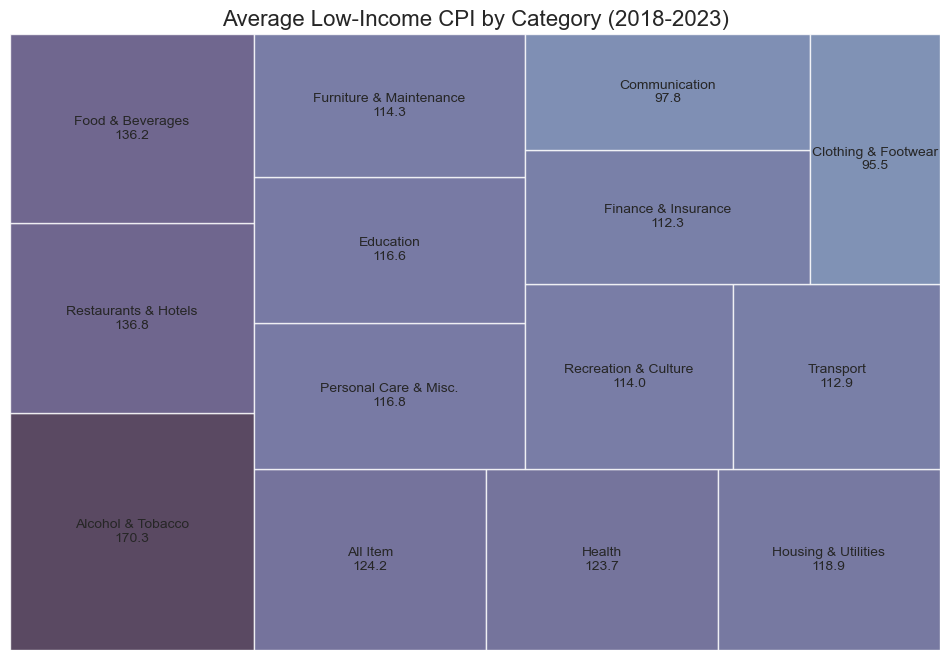

In [38]:
# obj2: Identify categories driving inflation

# Create continuous colormap
cmap = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)

# Sort categories by index descending
category_avg = category_avg.sort_values(by='index', ascending=False)

plt.figure(figsize=(12,8))
squarify.plot(
    sizes=category_avg['index'],
    label=category_avg['category'] + '\n' + category_avg['index'].round(1).astype(str),
    color=cmap(category_avg['index'] / category_avg['index'].max()),
    alpha=0.8
)
plt.title("Average Low-Income CPI by Category (2018-2023)", fontsize=16)
plt.axis('off')
plt.show()


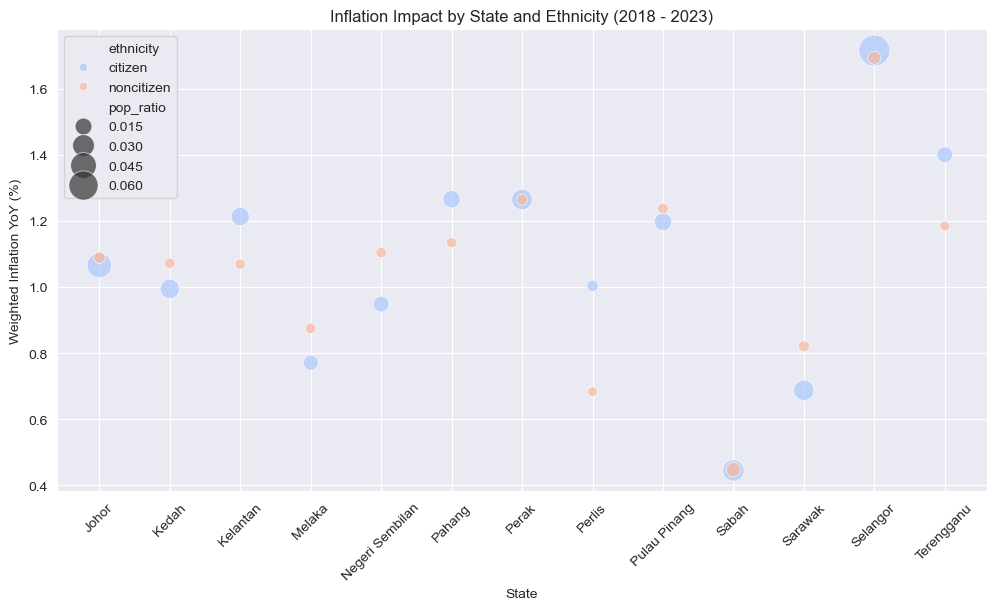

In [39]:
# obj3: Examine demographic vulnerability
scatterplot_data = demo_state_agg.merge(demo_filtered.groupby(['state','ethnicity'])['pop_ratio'].sum().reset_index(), on=['state','ethnicity'])

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=scatterplot_data,
    x='state',
    y='weighted_inflation',
    size='pop_ratio',
    hue='ethnicity',
    palette='coolwarm',
    alpha=0.7,
    sizes=(50,500)
)
plt.title("Inflation Impact by State and Ethnicity (2018 - 2023)")
plt.ylabel("Weighted Inflation YoY (%)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()


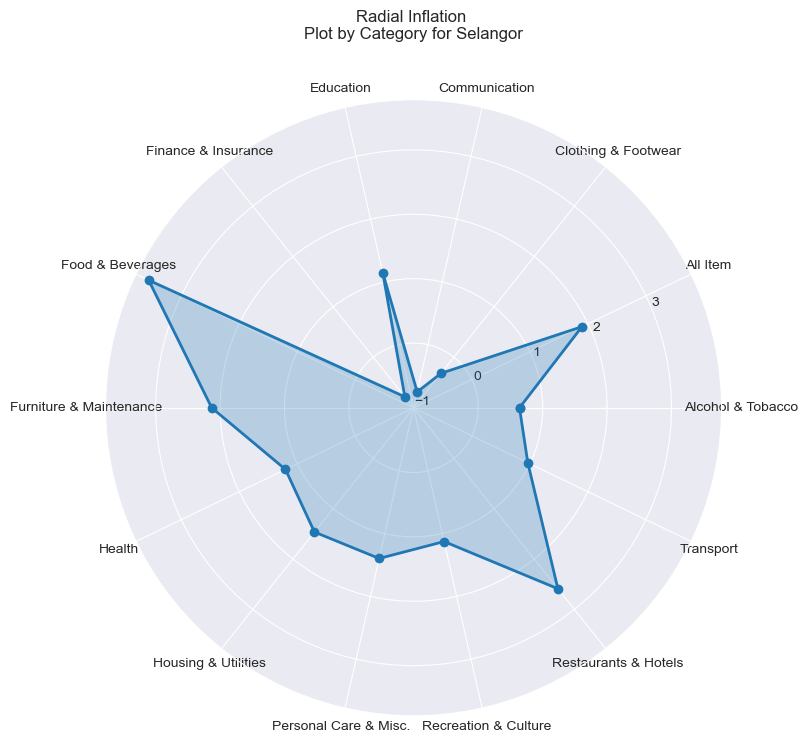

In [41]:
# obj4: Patterns & relationships (states & categories)
state = 'Selangor'
subset = state_cat_avg[state_cat_avg['state'] == state]
categories = subset['category']
inflation = subset['inflation_yoy']

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
inflation = inflation.tolist()

# Make the plot circular
inflation += inflation[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, inflation, 'o-', linewidth=2)
ax.fill(angles, inflation, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title(f"Radial Inflation \nPlot by Category for {state}\n\n\n")
plt.show()




```
# This is formatted as code
```

## 5️⃣ Data Insights

- Summarize your main takeaways. What patterns or trends did you find?